## **Simple CNN Implemented using Keras.**

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [28]:
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

In [30]:
# Define a simple CNN model
model = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Compile the model
model.compile(optimizer="adam",

  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"])

In [32]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9132 - loss: 0.2890 - val_accuracy: 0.9842 - val_loss: 0.0526
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9864 - loss: 0.0448 - val_accuracy: 0.9875 - val_loss: 0.0379
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9921 - loss: 0.0255 - val_accuracy: 0.9899 - val_loss: 0.0276
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9885 - val_loss: 0.0374
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9957 - loss: 0.0141 - val_accuracy: 0.9913 - val_loss: 0.0282


In [33]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9885 - loss: 0.0357
Test accuracy: 0.9913


In [34]:
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


## **Task 1: Data Understanding and Visualization:**

In [35]:
import zipfile

In [38]:
file_path = '/content/FruitinAmazon.zip'

In [39]:
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/FruitinAmazon')

In [40]:
# Define paths
train_dir = '/content/FruitinAmazon/FruitinAmazon/train'
test_dir = '/content/FruitinAmazon/FruitinAmazon/test'

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

*   Get the list of class directories from the train folder.
*   Select one image randomly from each class.
*   Display the images in a grid format with two rows using matplotlib.

In [41]:
import os
import random
import matplotlib.pyplot as plt

def visualize_data(train_data_dir):
    # Get the list of class directories
    class_dirs = [d for d in os.listdir(train_data_dir) ]
    print(class_dirs)

    # Select one image randomly from each class
    images = []
    labels = []
    for class_dir in class_dirs:
        class_path = os.path.join(train_data_dir, class_dir)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)
        images.append(plt.imread(image_path))
        labels.append(class_dir)

    # Display the images in a grid format with two rows using matplotlib
    fig, axes = plt.subplots(2, len(class_dirs) // 2, figsize=(12, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        row = i // (len(class_dirs) // 2)
        col = i % (len(class_dirs) // 2)
        axes[row, col].imshow(image)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

['guarana', 'cupuacu', 'graviola', 'tucuma', 'acai', 'pupunha']


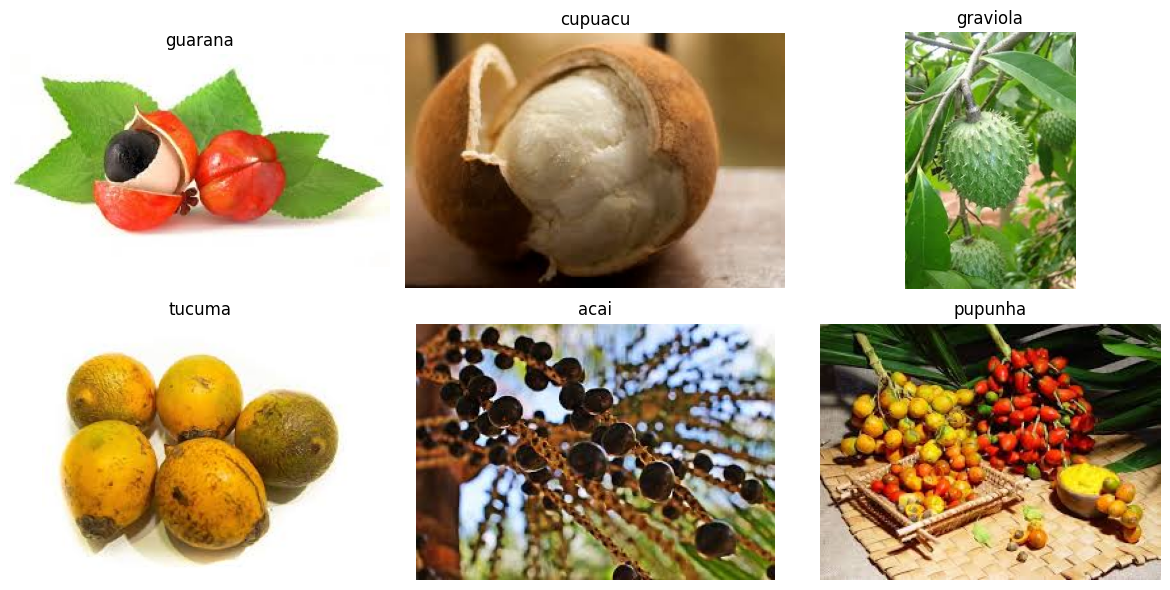

In [14]:
visualize_data(train_dir)

2. Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No Corrupted Images Found.”

Hint:
- Iterate through each class subdirectory and check if each image is valid.
- Use the Image.open() function to attempt to load each image.
- If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from the directory and print f"Removed corrupted image: {image_path}".
- Maintain a list of all corrupted image paths for reporting.

Expected Output: No corrupted images found.

In [42]:
import os
from PIL import Image

def check_and_remove_corrupted_images(train_folder):
    corrupted_images = []
    for class_dir in os.listdir(train_folder):
        class_path = os.path.join(train_folder, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    with Image.open(image_path) as img:
                        # Verify image format
                        img.verify()
                except (IOError, SyntaxError) as e:
                    corrupted_images.append(image_path)
                    os.remove(image_path)
                    print(f"Removed corrupted image: {image_path}")

    if not corrupted_images:
        print("No corrupted images found.")
    else:
        print(f"Total corrupted images removed: {len(corrupted_images)}")


check_and_remove_corrupted_images(train_dir)

No corrupted images found.


## **Task 2: Loading and Preprocessing Image Data in keras:**

In [43]:
import tensorflow as tf
# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Follow the following Structure and Hyper - parameters:

Convolutional Architecture:

* Convolutional Layer 1:
 - Filter Size (F): (3, 3)
 - Number of Filters (k): 32
 - Padding (P): same
 - Stride (s): 1
* Activation Layer: ReLU activation
* Pooling Layer 1: Max pooling
 - Filter Size (F): (2, 2)
 - Stride (s): 2
* Convolutional Layer 2:
 - Filter Size (F): (3, 3)
 - Number of Filters (k): 32
 - Padding (P): same
 - Stride (s): 1
* Activation Layer: ReLU activation
* Pooling Layer 2: Max pooling
  - Filter Size (F): (2, 2)
  - Stride (s): 2

Fully Connected Network Architecture:
* Flatten Layer: Flatten the input coming from the convolutional layers
* Input Layer:
* Hidden Layer - 2:
  - Number of Neurons: 64
  - Number of Neurons: 128
* Output Layer:
  - Number of Neurons: num classes (number of output classes)

In [44]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(6, activation='softmax') # 6 for 6 classes of fruits
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

## **Task 4: Compile the Model**

**Model Compilation**

* Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [45]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

## **Task 4: Train the Model**

Model Training

* Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.
* Use val ds for validation.

* Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
callbacks = [
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_ds,
    epochs=250,
    batch_size=16,
    validation_data=val_ds,  # Use val_ds for validation
    callbacks=callbacks  # Use callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.2465 - loss: 1.9686
Epoch 1: val_loss improved from inf to 1.56371, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 918ms/step - accuracy: 0.2370 - loss: 1.9919 - val_accuracy: 0.4444 - val_loss: 1.5637
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.2749 - loss: 1.6876
Epoch 2: val_loss did not improve from 1.56371
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 450ms/step - accuracy: 0.2756 - loss: 1.6877 - val_accuracy: 0.0000e+00 - val_loss: 1.7929
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.3698 - loss: 1.6011
Epoch 3: val_loss did not improve from 1.56371
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 457ms/step - accuracy: 0.3711 - loss: 1.5960 - val_accuracy: 0.0556 - val_loss: 1.7536
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.2830 - loss: 1.4453
Epoch 4: val_loss improved from 1.56371 to 1.31677, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 488ms/step - accuracy: 0.2956 - loss: 1.4345 - val_accuracy: 0.4444 - val_loss: 1.3168
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.5891 - loss: 1.1146
Epoch 5: val_loss improved from 1.31677 to 1.01357, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 582ms/step - accuracy: 0.5946 - loss: 1.1170 - val_accuracy: 0.5556 - val_loss: 1.0136
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.6198 - loss: 0.8792
Epoch 6: val_loss did not improve from 1.01357
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 460ms/step - accuracy: 0.6211 - loss: 0.8759 - val_accuracy: 0.6667 - val_loss: 1.0578
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.7598 - loss: 0.7255
Epoch 7: val_loss improved from 1.01357 to 0.59171, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step - accuracy: 0.7609 - loss: 0.7273 - val_accuracy: 0.8889 - val_loss: 0.5917
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9062 - loss: 0.5359
Epoch 8: val_loss improved from 0.59171 to 0.57135, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.8984 - loss: 0.5407 - val_accuracy: 0.8333 - val_loss: 0.5714
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9861 - loss: 0.2706
Epoch 9: val_loss did not improve from 0.57135
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.9792 - loss: 0.2831 - val_accuracy: 0.8333 - val_loss: 0.6228
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 1.0000 - loss: 0.1777
Epoch 10: val_loss did not improve from 0.57135
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 1.0000 - loss: 0.1780 - val_accuracy: 0.6111 - val_loss: 0.9666
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9554 - loss: 0.2671
Epoch 11: val_loss did not improve from 0.57135
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step - accuracy: 0.9527 - loss: 0.2656 - val_accuracy: 0.7778 - val_loss: 0.6265
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9902 - loss: 0.0955
Epoch 12: val_loss did not improve from 0.57135
3/3 ━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 501ms/step - accuracy: 1.0000 - loss: 0.0432 - val_accuracy: 0.8333 - val_loss: 0.4103
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 1.0000 - loss: 0.0428
Epoch 16: val_loss improved from 0.41029 to 0.23820, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 494ms/step - accuracy: 1.0000 - loss: 0.0444 - val_accuracy: 0.8333 - val_loss: 0.2382
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 1.0000 - loss: 0.0215
Epoch 17: val_loss did not improve from 0.23820
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - accuracy: 1.0000 - loss: 0.0219 - val_accuracy: 0.8333 - val_loss: 0.3126
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 1.0000 - loss: 0.0234
Epoch 18: val_loss did not improve from 0.23820
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.8333 - val_loss: 0.4688
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 1.0000 - loss: 0.0079
Epoch 19: val_loss did not improve from 0.23820
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.8333 - val_loss: 0.6521
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 1.0000 - loss: 0.0070
Epoch 20: val_loss did not improve from 0.23820
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 855ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.8333 - val_loss: 0.2253
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 1.0000 - loss: 0.0046
Epoch 24: val_loss did not improve from 0.22529
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 446ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.8333 - val_loss: 0.2432
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 1.0000 - loss: 0.0026
Epoch 25: val_loss did not improve from 0.22529
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8333 - val_loss: 0.2785
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 1.0000 - loss: 0.0109
Epoch 26: val_loss did not improve from 0.22529
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.8333 - val_loss: 0.2788
Epoch 27/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 1.0000 - loss: 0.0034
Epoch 27: val_loss did not improve from 0.22529
3/3 

## **Task 5: Evaluate the Model**

**Model Evaluation**

* After training, evaluate the model using model.evaluate() on the test set to check the test accuracy and loss.

In [47]:
# Create test dataset with normalization
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False  # Important to keep test data in original order
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [48]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5667 - loss: 1.1160
Test Loss: 1.115978717803955
Test Accuracy: 0.5666666626930237


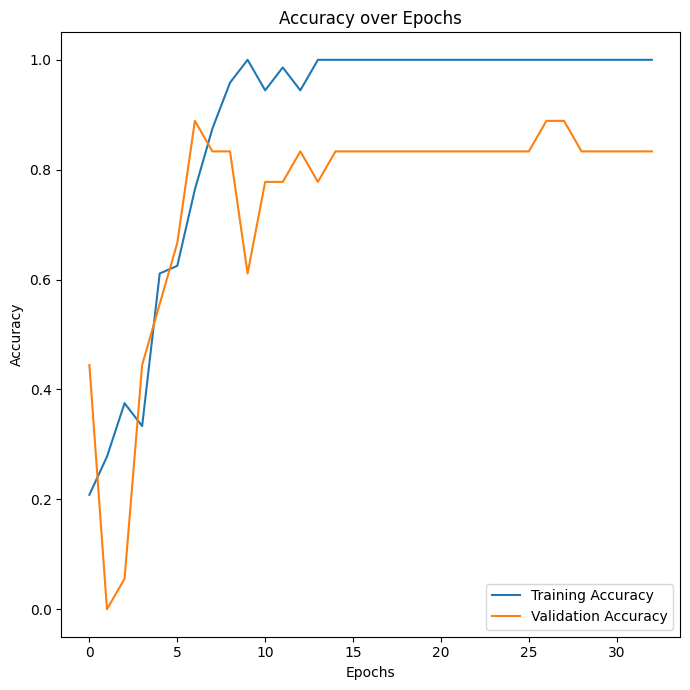

In [49]:
# Plot training and validation accuracy
plt.figure(figsize=(7, 7))
# Accuracy plot

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

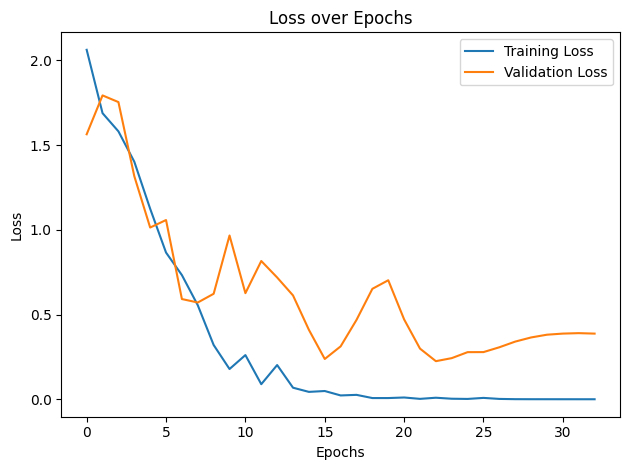

In [50]:
# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## **Task 6: Save and Load the Model**

**Model Saving and Loading**

* Save the trained model to an .h5 file using model.save().
* Load the saved model and re-evaluate its performance on the test set.

1. Save the model

In [51]:
# Save the trained model to an .h5 file
model.save('my_fruit_model.h5')

2. Load the Model

In [52]:
# Load the saved model
loaded_model = tf.keras.models.load_model('my_fruit_model.h5')

# Re-evaluate the model on the test dataset
loss, accuracy = loaded_model.evaluate(test_ds)

print('Test Loss (Loaded Model):', loss)
print('Test Accuracy (Loaded Model):', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.5667 - loss: 1.1160
Test Loss (Loaded Model): 1.115978717803955
Test Accuracy (Loaded Model): 0.5666666626930237


## **Task 7: Predictions and Classification Report**

Making Predictions

* Use model.predict() to make predictions on test images.
* Convert the model’s predicted probabilities to digit labels using np.argmax().
* Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

In [53]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions
predictions = model.predict(test_ds)

# Convert probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_labels = []
for images, labels in test_ds.unbatch():  # Unbatch the dataset to get individual labels
    true_labels.append(labels.numpy())  # Use append instead of extend

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.40      0.50         5
           2       0.50      1.00      0.67         5
           3       1.00      0.40      0.57         5
           4       0.67      0.40      0.50         5
           5       0.33      0.40      0.36         5

    accuracy                           0.57        30
   macro avg       0.64      0.57      0.55        30
weighted avg       0.64      0.57      0.55        30

